<a href="https://colab.research.google.com/github/Sajay1567/Capstone_Project-Automobile/blob/main/Project_Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Poject Title - Appliance Energy Prediction**

**Problem Description**

The goal of this project is to develop a machine learning model to predict the energy consumption of household appliances based on various environmental and weather conditions.

**Data Description **

The dataset contains 19,735 records of energy consumption measured over time along with multiple environmental variables such as temperature, humidity, wind speed, and visibility. The target variable is the energy consumption of appliances, and the features include both indoor and outdoor environmental factors.

Features:
Temperature (T1-T9): Temperature readings from different locations inside the house.

Relative Humidity (RH_1-RH_9): Corresponding relative humidity readings.

Outdoor Temperature (T_out), Visibility, Windspeed, Pressure (Press_mm_hg), Dew Point Temperature (Tdewpoint), and Outdoor Humidity (RH_out): Weather-related features.

Lights: Energy consumption of lights (as an additional feature).

rv1 and rv2: Two features that are unknown and may or may not contribute to the prediction.

Target Variable:
Appliances: Energy consumption of household appliances (in Wh), which is the value we aim to predict.

Challenge:
The dataset includes multiple indoor and outdoor factors that may affect energy consumption, making it a multivariate regression problem.

The complexity of interactions between environmental factors and energy consumption requires an advanced machine learning model to capture patterns.

Goal:
To build a machine learning model that accurately predicts appliance energy consumption using environmental data, improving over basic models by applying advanced techniques such as Random Forests or Gradient Boosting.




In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

**IMPORT DATASET**



In [4]:
data = pd.read_csv('//content/Copy of data_application_energy.csv', encoding= 'unicode_escape')

In [5]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
data.isnull().sum()

,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


From the above command and figure, we noticed that every column has 0 null values. This seems to be clean data and there is no missing data in any of the rows and columns.

**Exploratory Data Analysis (EDA)**

**Understanding Your Variables**

In [8]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [9]:
# Dataset Describe
data.describe(include = 'all')

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


Variables Description
T1: Temperature in kitchen area, in Celsius

T2: Temperature in living room area, in Celsius

T3: Temperature in laundry room area, in Celsius

T4: Temperature in office room, in Celsius

T5: Temperature in bathroom, in Celsius

T6: Temperature outside the building (north side), in Celsius

T7: Temperature in ironing room , in Celsius

T8: Temperature in teenager room 2, in Celsius

T9: Temperature in parents room, in Celsius

RHI: Humidity in kitchen area, in %

RH2: Humidity in living room area, in %

RH3: Humidity in laundry room area, in %

RH4: Humidity in office room, in %

RH5: Humidity in bathroom, in %

RH6: Humidity outside the building (north side), in %

RH7: Humidity in ironing room, in %

RH8: Humidity in teenager room 2,in %

RH9: Humidity in parents room, in %

To: Temperature outside (from Chievres weather station), in Celsius

Pressure: (from Chievres weather station), in mm Hg

Hg RHout: Humidity outside (from Chievres weather station), in %

Wind speed: (from Chievres weather station), in m/s

Visibility: (from Chievres weather station), in km

Tdewpoint: (from Chievres weather station), A*C

Appliances, energy use in Wh: Dependent variable

# **Check Unique Values for each variable**

In [10]:
# Check Unique Values for each variable.
print('\n')
print('Unique value count for each column:')

for col in data.columns:
  print(col,':',len(data[col].unique()))

print('\n')
print('\n')
print('Unique values in Appliances columns: \n',np.sort(data['Appliances'].unique()))
print('\n')
print('Unique values in lights columns:',np.sort(data['lights'].unique()))
print('\n')
print('Rest of the columns are of float type so the have so many unique values.')



Unique value count for each column:
date : 19735
Appliances : 92
lights : 8
T1 : 722
RH_1 : 2547
T2 : 1650
RH_2 : 3376
T3 : 1426
RH_3 : 2618
T4 : 1390
RH_4 : 2987
T5 : 2263
RH_5 : 7571
T6 : 4446
RH_6 : 9709
T7 : 1955
RH_7 : 5891
T8 : 2228
RH_8 : 6649
T9 : 924
RH_9 : 3388
T_out : 1730
Press_mm_hg : 2189
RH_out : 566
Windspeed : 189
Visibility : 413
Tdewpoint : 1409
rv1 : 19735
rv2 : 19735




Unique values in Appliances columns: 
 [  10   20   30   40   50   60   70   80   90  100  110  120  130  140
  150  160  170  180  190  200  210  220  230  240  250  260  270  280
  290  300  310  320  330  340  350  360  370  380  390  400  410  420
  430  440  450  460  470  480  490  500  510  520  530  540  550  560
  570  580  590  600  610  620  630  640  650  660  670  680  690  700
  710  720  730  740  750  760  770  780  790  800  820  830  840  850
  860  870  880  890  900  910 1070 1080]


Unique values in lights columns: [ 0 10 20 30 40 50 60 70]


Rest of the columns are of float 

# **Data Wrangling**

In [11]:
# Separating columns:
temperature_column = [i for i in data.columns if "T" in i]
humidity_column = [i for i in data.columns if "RH" in i]
other = [i for i in data.columns if ("T" not in i)&("RH" not in i)]

In [12]:
data[temperature_column].describe(include='all')

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T_out,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828,7.411665,3.760707
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712,5.317409,4.194648
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,-5.000000,-6.600000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000,3.666667,0.900000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000,6.916667,3.433333
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000,10.408333,6.566667
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,26.100000,15.500000


we can derive several insights:

Count:

There are 19,735 data points for each of the temperature-related variables (T1, T2, T3, T4, T5, T6, T7, T8, T9, T_out, and Tdewpoint). This indicates that there are no missing values in these columns.

Mean (Average):

The mean values for the temperature-related variables are in the range of 16.79°C to 26.26°C. The "T3" variable has the highest mean at approximately 22.27°C, while "T5" has the lowest mean at about 19.59°C.

Standard Deviation (std):

The standard deviations for the temperature-related variables range from approximately 1.61°C to 2.20°C. Variables like "T3" and "T4" have relatively low variability, while "T9" has slightly higher variability.

Minimum (min):

The minimum values for the temperature-related variables range from 15.10°C to 29.24°C. These values indicate the lower bounds of the temperature measurements.

25th Percentile (25%):

The 25th percentile values represent the lower quartile of the data. For example, the 25th percentile of "T2" is approximately 18.79°C.

Median (50%):

The median values (50th percentile) represent the middle values of the dataset. For instance, the median temperature "T7" is approximately 20.03°C.

75th Percentile (75%):
The 75th percentile values represent the upper quartile of the data. The 75th percentile of "T6" is approximately 11.26°C.
Maximum (max):

The maximum values represent the upper bounds of the temperature measurements. "T4" has the highest maximum value at approximately 26.20°C, while "T5" has the lowest maximum at about 25.79°C.

In [13]:
data[humidity_column].describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,RH_out
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401,79.750418
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497,14.901088
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,24.000000
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000,70.333333
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000,83.666667
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095,91.666667
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,100.000000


In [14]:
# Create a dictionary to map current column names to new column names
column_mapping = {'T1': 'KITCHEN_TEMP',
    'RH_1': 'KITCHEN_HUM',
    'T2': 'LIVING_TEMP',
    'RH_2' :'LIVING_HUM',
    'T3': 'BEDROOM_TEMP',
    'RH_3':'BEDROOM_HUM',
    'T4' : 'OFFICE_TEMP',
    'RH_4' : 'OFFICE_HUM',
    'T5' : 'BATHROOM_TEMP',
    'RH_5': 'BATHROOM_HUM',
    'T6':'OUTSIDE_TEMP_build',
    'RH_6': 'OUTSIDE_HUM_build',
    'T7': 'IRONING_ROOM_TEMP',
    'RH_7' : 'IRONING_ROOM_HUM',
    'T8' :'TEEN_ROOM_2_TEMP',
    'RH_8' : 'TEEN_ROOM_HUM',
    'T9': 'PARENTS_ROOM_TEMP',
    'RH_9': 'PARENTS_ROOM_HUM',
    'T_out' :'OUTSIDE_TEMP_wstn',
    'RH_out' :'OUTSIDE_HUM_wstn'}

# Rename the columns using the mapping
data.rename(columns=column_mapping, inplace=True)

In [15]:
data.head()

,date,Appliances,lights,KITCHEN_TEMP,KITCHEN_HUM,LIVING_TEMP,LIVING_HUM,BEDROOM_TEMP,BEDROOM_HUM,OFFICE_TEMP,...,PARENTS_ROOM_TEMP,PARENTS_ROOM_HUM,OUTSIDE_TEMP_wstn,Press_mm_hg,OUTSIDE_HUM_wstn,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


creating new features

In [19]:
data.index = pd.to_datetime(data.index)

data['month'] = data.index.month
data['weekday'] = data.index.weekday
data['hour'] = data.index.hour
# data['week'] = data.index.isocalendar().week  # For pandas 1.1.0 or later
data['day'] = data.index.day
data['day_of_week'] = data.index.dayofweek


In [20]:
data.head(2)

,date,Appliances,lights,KITCHEN_TEMP,KITCHEN_HUM,LIVING_TEMP,LIVING_HUM,BEDROOM_TEMP,BEDROOM_HUM,OFFICE_TEMP,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour,day,day_of_week
1970-01-01 00:00:00.000000000,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,7.000000,63.000000,5.3,13.275433,13.275433,1,3,0,1,3
1970-01-01 00:00:00.000000001,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,6.666667,59.166667,5.2,18.606195,18.606195,1,3,0,1,3


Counting values of the "lights" column:

In [21]:
data['lights'].value_counts(normalize=True)

,proportion
lights,
0,0.772840
10,0.112085
20,0.082290
30,0.028325
40,0.003902
50,0.000456
70,0.000051
60,0.000051


77% value of lights column are 0 and it is not relevant for prediction. so we are going to drop this column

In [22]:
data.drop(columns='lights', inplace=True)

# reorder the data for clear vision

In [23]:
desired_order = ['KITCHEN_TEMP','LIVING_TEMP','BEDROOM_TEMP','OFFICE_TEMP','BATHROOM_TEMP','OUTSIDE_TEMP_build','IRONING_ROOM_TEMP','TEEN_ROOM_2_TEMP','PARENTS_ROOM_TEMP','OUTSIDE_TEMP_wstn',
                 'KITCHEN_HUM','LIVING_HUM','BEDROOM_HUM','OFFICE_HUM','BATHROOM_HUM','OUTSIDE_HUM_build','IRONING_ROOM_HUM','TEEN_ROOM_HUM','PARENTS_ROOM_HUM','OUTSIDE_HUM_wstn',
                 "Tdewpoint","Press_mm_hg","Windspeed","Visibility","rv1", "rv2",'month','weekday','hour','week','day','day_of_week',"Appliances"]
#assinging new_data as new name of dataframe
data = data.reindex(columns=desired_order)

Text(0, 0.5, 'Energy Consumption')

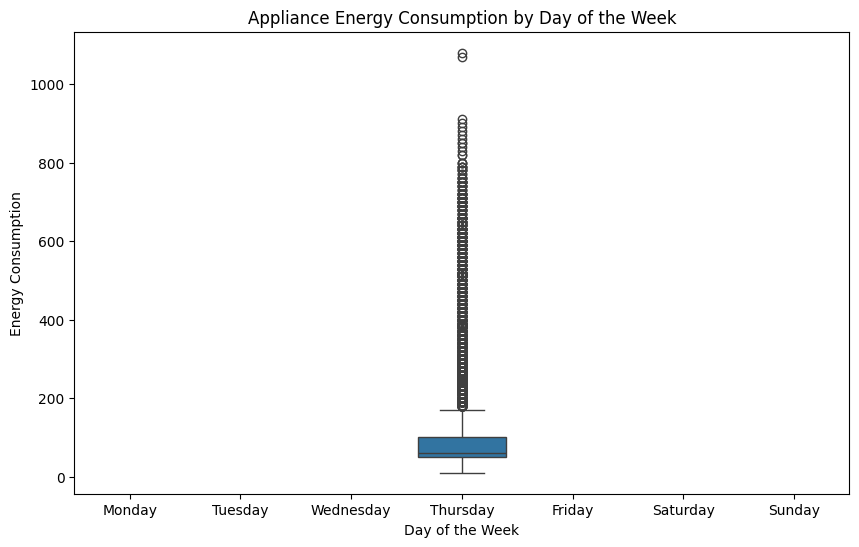

In [29]:
# Map the day of the week values to their respective names
'''day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['day_of_week'] = data['day_of_week'].map(lambda x: day_names[x])'''

# Create a box plot or violin plot to compare energy consumption across different days of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='Appliances', data=data, order=day_names)  # or sns.violinplot()
plt.title('Appliance Energy Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Energy Consumption')

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset (change 'path_to_your_file.csv' to the correct path)
data = pd.read_csv('/content/data_mobile_price_range.csv')

# Separate features (X) and target (y)
X = data.drop('price_range', axis=1)  # Drop the target column
y = data['price_range']  # Target variable

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ----- Decision Tree Classifier -----
# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X_train, y_train)

# Predict using the trained model
y_pred_tree = decision_tree.predict(X_test)

# Evaluate Decision Tree performance
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))


# ----- Random Forest Classifier -----
# Initialize Random Forest model
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(X_train, y_train)

# Predict using the trained model
y_pred_forest = random_forest.predict(X_test)

# Evaluate Random Forest performance
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Random Forest Accuracy: {accuracy_forest}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))


# ----- Optional: Hyperparameter Tuning -----
# Decision Tree with hyperparameter tuning
tuned_decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
tuned_decision_tree.fit(X_train, y_train)
y_pred_tuned_tree = tuned_decision_tree.predict(X_test)
print("Tuned Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tuned_tree))

# Random Forest with hyperparameter tuning
tuned_random_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
tuned_random_forest.fit(X_train, y_train)
y_pred_tuned_forest = tuned_random_forest.predict(X_test)
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_tuned_forest))


Decision Tree Accuracy: 0.8083333333333333
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       151
           1       0.74      0.81      0.77       146
           2       0.74      0.71      0.72       148
           3       0.86      0.85      0.85       155

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600

Random Forest Accuracy: 0.87
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       151
           1       0.83      0.86      0.84       146
           2       0.80      0.80      0.80       148
           3       0.92      0.87      0.90       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      